In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd

import utils

In [2]:
dates = pd.date_range("1999-01-01", "1999-12-31")
doys = dates.day_of_year

In [3]:
def circle_points(radius: float, num_points: int) -> tuple[np.ndarray]:
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    return x, y

def latitude_line(radius: float, latitude: float) -> np.ndarray:
    y = radius * np.sin(np.deg2rad(latitude))
    x = radius * np.cos(np.deg2rad(latitude))
    return (-x, x), (y, y)

def draw_earth(ax, latitude: int, radius=2):
    ax.clear()
    ax.add_patch(plt.Circle((0, 0), radius=radius, fill=True, color="grey", alpha=0.2))
    ax.plot(*latitude_line(radius=radius, latitude=latitude), color="red")

    ax.text(0, 0, f"{latitude}°", horizontalalignment="center", verticalalignment="center", size=24)

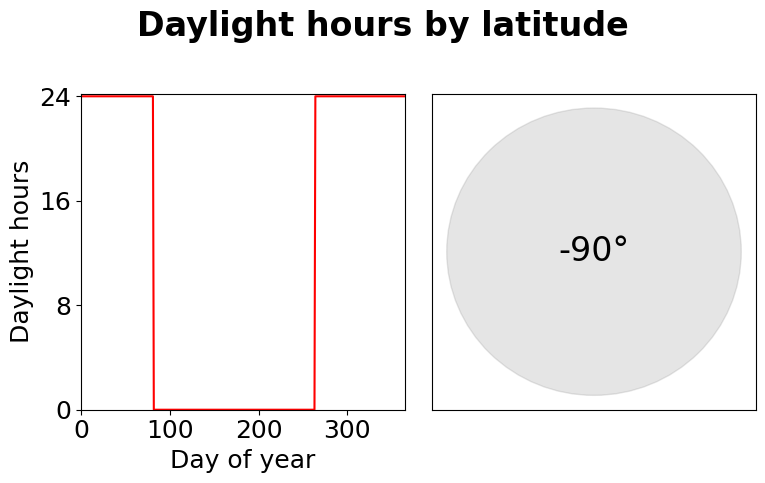

In [4]:
lats = list(range(-90, 91))

day_lengths = pd.DataFrame([
    {"doy": doy, "lat": lat, "day_hours": utils.get_day_length(latitude=lat, doy=doy)}
    for lat in lats for doy in doys]
)

plt.rcParams["font.size"] = 18
plt.rcParams["axes.labelsize"] = 18


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), tight_layout=True)
ax1.set_xlim(0, 365)
ax1.set_ylim(0, 24)

lat = 45
line, = ax1.plot(day_lengths[day_lengths.lat.eq(lat)].doy, day_lengths[day_lengths.lat.eq(-90)].day_hours, color="red")

plt.suptitle("Daylight hours by latitude", fontsize=24, fontweight="bold")
plt.subplots_adjust(wspace=0.06)

def animate(i):
    lat = lats[i]
    y = day_lengths[day_lengths.lat.eq(lat)].day_hours

    ax1.set_ylim(0, 24.2)
    line.set_ydata(y)

    ax1.set_xlabel("Day of year")
    ax1.set_ylabel("Daylight hours")

    draw_earth(ax2, latitude=lat)

    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax2.tick_params(length=0)
    ax1.set_xticks(np.arange(0, 365, 100))
    ax1.set_yticks(np.arange(0, 25, 8))


    return line,

ani = FuncAnimation(fig, animate, frames=180, interval=30)

In [5]:
ani.save("../figures/daylight_hours.gif")